In [185]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as mag
from matplotlib import rcParams
import scipy as sp 
from scipy.special import ellipk, ellipe


COLOR = 'black'
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

# axes
rcParams['axes.grid'] = True
rcParams['axes.grid.axis'] = 'both'
rcParams['axes.axisbelow'] = True
rcParams['axes.facecolor'] = 'lightgray'

# figure:
rcParams['figure.autolayout'] = True
rcParams['figure.dpi'] = 100
rcParams['figure.figsize'] = [8, 6]


# fontsizes
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12
rcParams['legend.title_fontsize'] = 12
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 20

rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'

# legend
# rcParams['legend.framealpha'] = 1
rcParams['legend.fancybox'] = False
rcParams['legend.edgecolor'] = 'gray'


# save
rcParams['savefig.bbox'] = 'tight'


### Simulación imán de neodimio

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0.

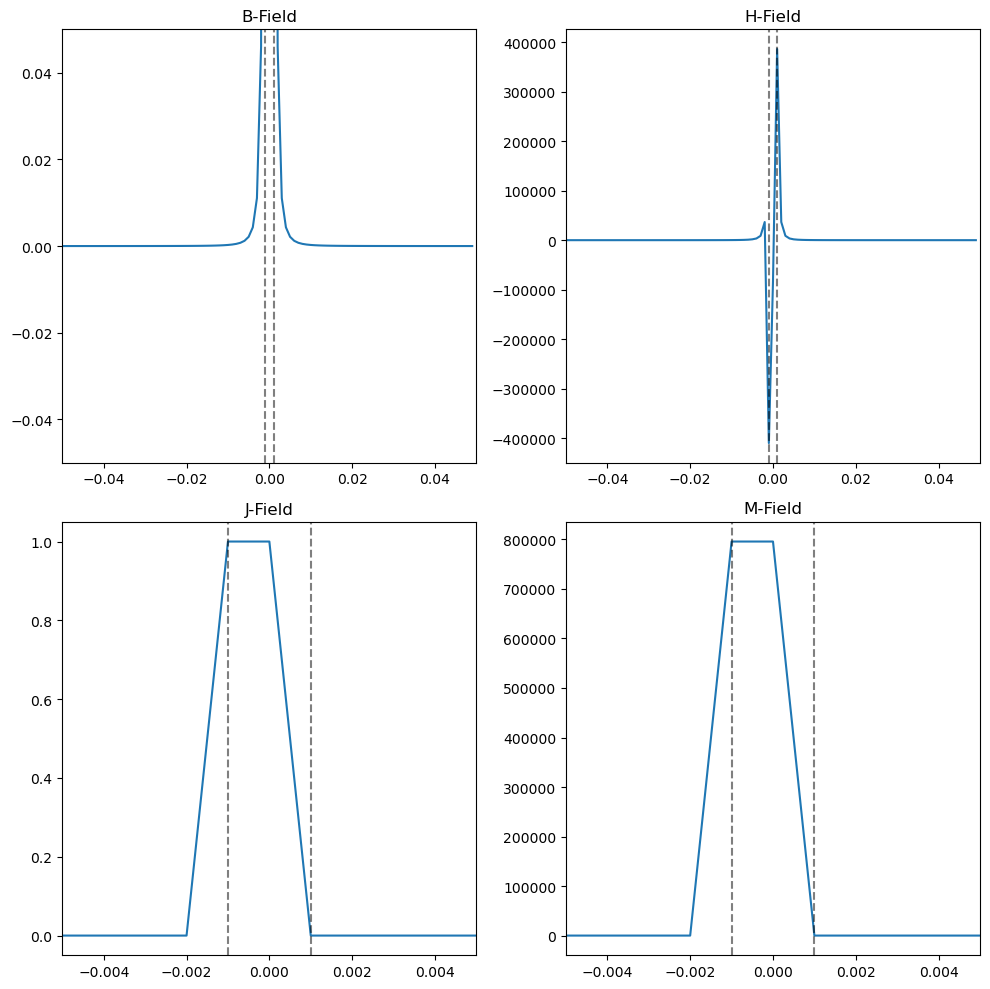

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import magpylib as magpy

fig, [[ax1,ax2], [ax3,ax4]] = plt.subplots(2, 2, figsize=(10, 10))

# Compute BHJM-fields of a cylinder magnet on the grid
cyl = magpy.magnet.Cylinder(polarization=(0, 0, 1), dimension=(0.001, 0.002))  # pol = 1 T, D = 1 mm, L = 2 mm

points = np.array([[0, 0, i] for i in np.arange(-0.05, 0.05, 0.001)]) # in SI Units (m)
sensor = magpy.Sensor()
sensor.position = (0,0,0.01)

# grid = np.meshgrid(np.linspace(-0.05, 0.05, 100), np.linspace(-0.05, 0.05, 100))

magpy.show(cyl, sensor)

B = cyl.getB(points)
Bx, By, Bz = B[:,0], B[:,1], B[:,2]

z = points[:, 2]

H = cyl.getH(points)
Hx, Hy, Hz = H[:,0], H[:,1], H[:,2]

J = cyl.getJ(points)
Jx, Jy, Jz = J[:,0], J[:,1], J[:,2]
print(J)

M = cyl.getM(points)
Mx, My, Mz = M[:,0], M[:,1], M[:,2]
print(M)

# # Display field with Pyplot
ax1.plot(z, Bz)
ax2.plot(z, Hz)
ax1.set(xlim=(-0.05,0.05),
        ylim=(-0.05,0.05))
ax2.set(xlim=(-0.05,0.05))
ax3.plot(z, Jz)
ax3.set(xlim=(-0.005,0.005))
ax4.plot(z, Mz)
ax4.set(xlim=(-0.005,0.005))

ax1.set_title("B-Field")
ax2.set_title("H-Field")
ax3.set_title("J-Field")
ax4.set_title("M-Field")

for ax in [ax1, ax2, ax3, ax4]:
    # Outline magnet boundary
    # ts = np.linspace(0, 2 * np.pi, 50)
    ax.axvline(-0.001, 0, 1, color='k', ls = '--', alpha = 0.5)
    ax.axvline(0.001, 0, 1, color='k', ls = '--', alpha = 0.5)

plt.tight_layout()
plt.show()

### Campo de una espira con los parámetros del problema

In [186]:
# params:
u0 = 1
I = -1
b = u0*I/(2*np.pi)
a = 0.39
d = a

# coord:
c_z = np.linspace(-0.4, 0.4, 100)
c_rho = np.linspace(-0.4, 0.4, 100)
rho, z = np.meshgrid(c_rho, c_z, indexing='xy')

def B(rho, z, a, b):
    k_sq = 4*a*rho/((a + rho)**2 + z**2)
    c = 1/np.sqrt((a + rho)**2 + z**2)

    B_rho = b*c*(z/rho)*((a**2 + rho**2 + z**2)*ellipe(k_sq)/((a - rho)**2 + z**2) - ellipk(k_sq))
    B_z = b*c*((a**2 - rho**2 - z**2)*ellipe(k_sq)/((a - rho)**2 + z**2) - ellipk(k_sq))

    B_spire = np.meshgrid(B_rho, B_z, indexing='xy') 
    return np.array([B_rho, B_z]) # me queda juntar esto para q sea una matriz de la misma forma que grid

B_spire = B(rho, z, a, b)

(100, 100)


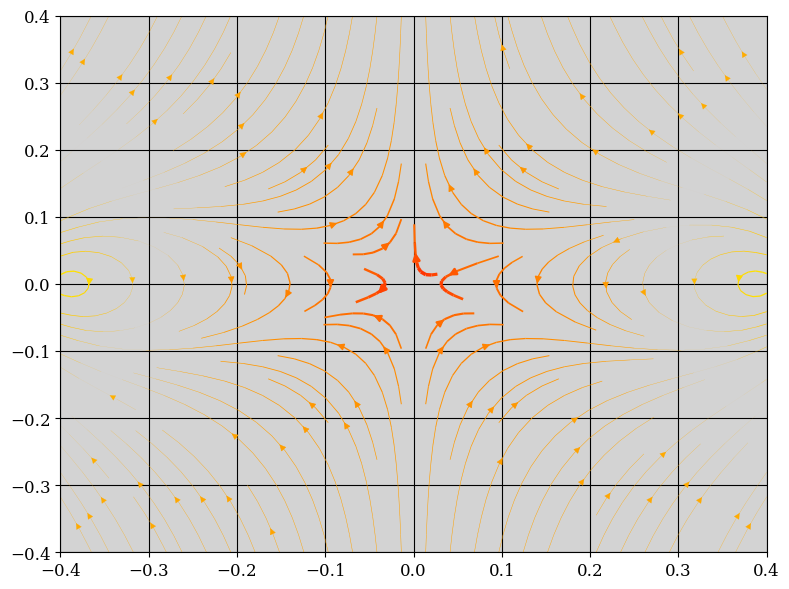

In [187]:
fig, ax = plt.subplots()

log10_norm_B = np.log10(np.linalg.norm(B_spire, axis=0))
print(log10_norm_B.shape)

splt = ax.streamplot(
    rho,
    z,
    B_spire[0],
    B_spire[1],
    color=log10_norm_B,
    density=1,
    linewidth=log10_norm_B,
    cmap="autumn",
)

### Campo de una bobina con los parámetros del problema

In [188]:
# params:
u0 = 1
I = 1
b = -u0*I/2*np.pi
a = 0.39
d = a

# coord:
c_z = np.linspace(-0.4, 0.4, 100)
c_rho = np.linspace(-0.4, 0.4, 100)
rho, z = np.meshgrid(c_rho, c_z, indexing='xy')

entorno_menos = np.linspace(-d/2 - 5e-3,-d/2 + 5e-3,8)
entorno_mas = np.linspace(d/2 - 5e-3,d/2 + 5e-3,8)

B_bobina_minus = np.zeros(np.shape(B_spire))  # esto es para salir del paso pq ya me cuesta pensar nomás
B_bobina_plus = np.zeros(np.shape(B_spire))

for i in entorno_menos:
    z_minus = z - i
    B_minus = B(rho, z_minus, a , b)
    B_bobina_minus += B_minus

for i in entorno_mas:
    z_plus = z - i
    B_plus = B(rho, z_plus, a , b)
    B_bobina_plus += B_plus

B_par = B_bobina_minus + B_bobina_plus

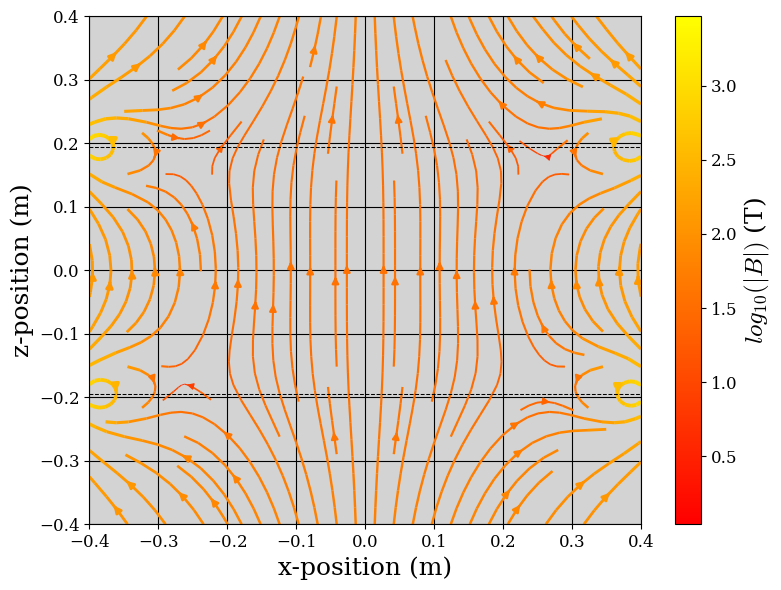

In [189]:
fig, ax = plt.subplots()

log10_norm_B = np.log10(np.linalg.norm(B_par, axis=0))

# Display the B-field with streamplot using log10-scaled
# color function and linewidth
splt = ax.streamplot(
    rho,
    z,
    B_par[0],
    B_par[1],
    color=log10_norm_B,
    density=1,
    linewidth=log10_norm_B,
    cmap="autumn",
)

# Add colorbar with logarithmic labels
cb = fig.colorbar(splt.lines, ax=ax, label="$log_{10}(|B|)$ (T)")

# Figure styling
ax.set(
    xlabel="x-position (m)",
    ylabel="z-position (m)",
)
ax.axhline(d/2, color='k', linestyle='dashed', linewidth=0.75)
ax.axhline(-d/2, color='k', linestyle='dashed', linewidth=0.75)

plt.tight_layout()